In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Lets write a spiking autoencoder with 1 hidden layer
def sigmoid(t, tau):
    return 1 / (1 + np.exp(-(t-0.5)/tau))

class AutoEncoder():
    def __init__(self, N_INP, N_HIDDEN, LEARNING_RATE, sparsity=0.1):
        self.LEARNING_RATE = LEARNING_RATE
        
        self.N_INP = N_INP
        self.N_HIDDEN = N_HIDDEN
        
        # Employ random dense encoding matrix
        sparseEnc = np.random.uniform(0, 1, N_INP*N_HIDDEN).reshape((N_HIDDEN, N_INP)) < sparsity
        self.M_ENC = np.random.uniform(-1, 2, N_INP*N_HIDDEN).reshape((N_HIDDEN, N_INP)) / (N_INP * sparsity )
        self.M_ENC = np.multiply(self.M_ENC, sparseEnc)
        
        # Start with a random decoder matrix
        self.M_DEC = np.random.uniform(0, 2, N_INP*N_HIDDEN).reshape((N_INP, N_HIDDEN)) / N_HIDDEN
        
        # Init activity of hidden layer and output layer
        self.S_H = np.zeros(N_HIDDEN)
        self.V_O = np.zeros(N_INP)
        
    def update(self, V_I, withPES = False):
        V_H = self.M_ENC.dot(V_I)
        self.S_H = sigmoid(V_H, 0.1)
        self.V_O = self.M_DEC.dot(self.S_H)
        
        # PES learning rule
        if withPES:
            error = V_I - self.V_O
            self.M_DEC += self.LEARNING_RATE / self.N_HIDDEN * np.outer(error, self.S_H)

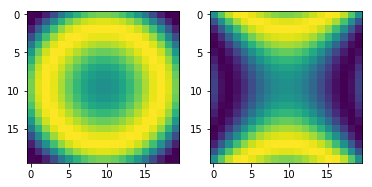

In [3]:
#Generate some random pictures
NPIX_X = 20
discr = np.linspace(0, 1, NPIX_X)
pic1 = np.array([[(1 + np.sin(10*((x-0.5)**2+(y-0.5)**2)))/2 for y in discr] for x in discr])
# pic1 = np.array([[(x+y)/2 for y in discr] for x in discr])
pic2 = np.array([[(1 + np.sin(10*((x-0.5)**2-(y-0.5)**2)))/2 for y in discr] for x in discr])

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(pic1)
ax[1].imshow(pic2);

<IPython.core.display.Javascript object>


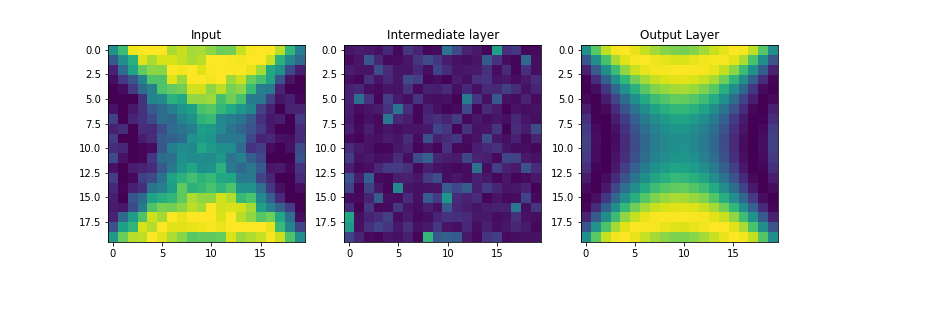

<IPython.core.display.Javascript object>


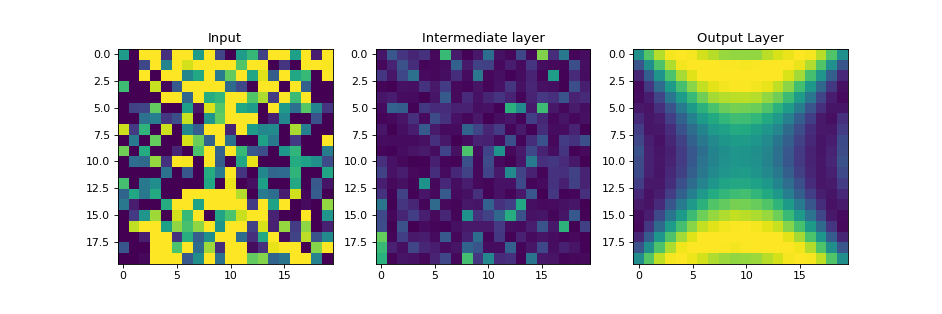

In [7]:
# GENERATE NETWORK
AE1 = AutoEncoder(NPIX_X**2, NPIX_X**2, 0.5)

###############################
# Learning part
###############################
%matplotlib notebook
plt.ion()
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))
plt1 = ax[0].imshow(pic1, vmin=0, vmax=1)
plt2 = ax[1].imshow(AE1.S_H.reshape((NPIX_X, NPIX_X)), vmin=0, vmax=1)
plt3 = ax[2].imshow(AE1.V_O.reshape((NPIX_X, NPIX_X)), vmin=0, vmax=1)
ax[0].set_title('Input')
ax[1].set_title('Intermediate layer')
ax[2].set_title('Output Layer')
plt.draw()
plt.pause(0.001)

inpFlat1 = np.ndarray.flatten(pic1)
inpFlat2 = np.ndarray.flatten(pic2)
tSim = 10000
for i in range(tSim):
    if int(i / 200) % 2 == 0:
        inp = inpFlat1 + np.random.uniform(-0.1, 0.1, NPIX_X**2)
    else:
        inp = inpFlat2 + np.random.uniform(-0.1, 0.1, NPIX_X**2)
    
    AE1.update(inp, withPES=True)
    
    if (i % 50) == 0:
        plt1.set_data(inp.reshape((NPIX_X, NPIX_X)))
        plt2.set_data(AE1.S_H.reshape((NPIX_X, NPIX_X)))
        plt3.set_data(AE1.V_O.reshape((NPIX_X, NPIX_X)))

        fig.canvas.draw()
        fig.canvas.flush_events()

###############################
# Testing part
###############################
%matplotlib notebook
plt.ion()
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))
plt1 = ax[0].imshow(pic1, vmin=0, vmax=1)
plt2 = ax[1].imshow(AE1.S_H.reshape((NPIX_X, NPIX_X)), vmin=0, vmax=1)
plt3 = ax[2].imshow(AE1.V_O.reshape((NPIX_X, NPIX_X)), vmin=0, vmax=1)
ax[0].set_title('Input')
ax[1].set_title('Intermediate layer')
ax[2].set_title('Output Layer')
plt.draw()
plt.pause(0.001)
    
tSim = 100
for i in range(tSim):
    if i < tSim / 2:
        inp = inpFlat1 + np.random.uniform(-1, 1, NPIX_X**2)
    else:
        inp = inpFlat2 + np.random.uniform(-1, 1, NPIX_X**2)
#     if i < tSim / 2:
#         inp = 0.8 * inpFlat1 + 0.2 * inpFlat2 #+ np.random.uniform(-0.1, 0.1, NPIX_X**2) #np.random.uniform(0, 1, NPIX_X**2)
#     else:
#         inp = 0.2 * inpFlat1 + 0.8 * inpFlat2 #inp = inpFlat2 + np.random.uniform(-0.1, 0.1, NPIX_X**2) #np.random.uniform(0, 1, NPIX_X**2)
    
#     inp = np.random.uniform(0, 1, NPIX_X**2)
    
    AE1.update(inp, withPES=False)
    
#     if (i % 100) == 0:
    plt1.set_data(inp.reshape((NPIX_X, NPIX_X)))
    plt2.set_data(AE1.S_H.reshape((NPIX_X, NPIX_X)))
    plt3.set_data(AE1.V_O.reshape((NPIX_X, NPIX_X)))

    fig.canvas.draw()
    fig.canvas.flush_events()



In [ ]:
# Lets write a spiking autoencoder with 1 hidden layer
def sigmoid(t, tau):
    return 1 / (1 + np.exp(-(t-0.5)/tau))

class SpikingAutoEncoder():
    def __init__(self, N_INP, N_HIDDEN, LEARNING_RATE, sparsity=0.1):
        self.LEARNING_RATE = LEARNING_RATE
        
        self.N_INP = N_INP
        self.N_HIDDEN = N_HIDDEN
        
        # Employ random dense encoding matrix
        sparseEnc = np.random.uniform(0, 1, N_INP*N_HIDDEN).reshape((N_HIDDEN, N_INP)) < sparsity
        self.M_ENC = np.random.uniform(-1, 2, N_INP*N_HIDDEN).reshape((N_HIDDEN, N_INP)) / (N_INP * sparsity )
        self.M_ENC = np.multiply(self.M_ENC, sparseEnc)
        
        # Start with a random decoder matrix
        self.M_DEC = np.random.uniform(0, 2, N_INP*N_HIDDEN).reshape((N_INP, N_HIDDEN)) / N_HIDDEN
        
        # Init activity of hidden layer and output layer
        self.S_H = np.zeros(N_HIDDEN)
        self.V_O = np.zeros(N_INP)
        
    def update(self, V_I, withPES = False):
        V_H = self.M_ENC.dot(V_I)
        self.S_H = sigmoid(V_H, 0.1)
        self.V_O = self.M_DEC.dot(self.S_H)
        
        # PES learning rule
        if withPES:
            error = V_I - self.V_O
            self.M_DEC += self.LEARNING_RATE / self.N_HIDDEN * np.outer(error, self.S_H)